### Завдання.
Протестуйте описані в лекції методи і моделі на датасеті AirPassenger, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. Порівняйте метрики оцінки моделі для двох датасетів.


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
import ml_metrics as metrics
warnings.filterwarnings("ignore")

In [146]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [147]:
pas = pd.read_csv('AirPassengers.csv', index_col='Month')
pas.index = pd.to_datetime(pas.index)
pas.rename(columns={'#Passengers' : 'Passengers'}, inplace=True)
pas.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [148]:
pas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


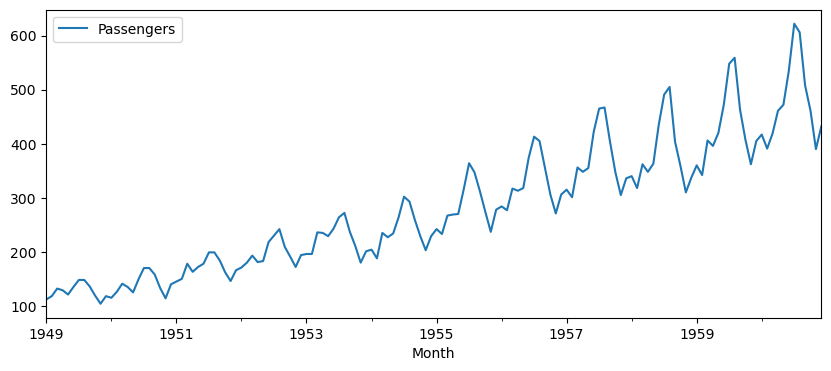

In [149]:
matplotlib.rcParams['figure.figsize'] = [10, 4]
pas.plot()
pyplot.show()

In [150]:
acf_value = acf(pas.Passengers)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

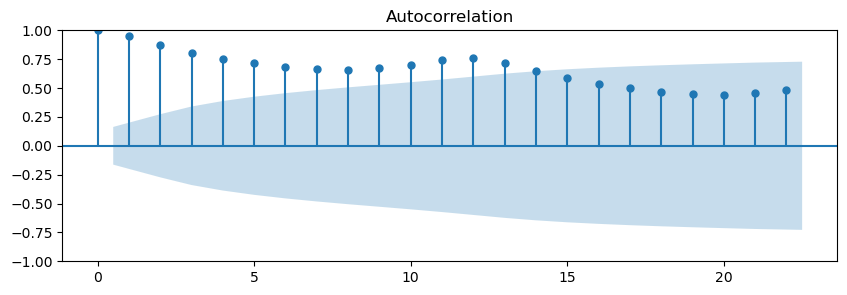

In [151]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_acf(pas.Passengers)
pyplot.show()

In [152]:
pacf_value = pacf(pas.Passengers, nlags=3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

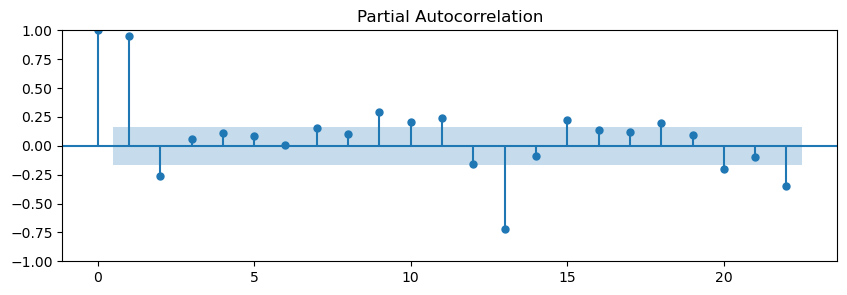

In [153]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_pacf(pas.Passengers)
pyplot.show()

### Модель ARIMA.

In [167]:
import statsmodels.api as sa

In [185]:
src_data_model = pas.Passengers[:114]
model = sa.tsa.ARIMA(src_data_model).fit()

In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  114
Model:                          ARIMA   Log Likelihood                -672.489
Date:                Sat, 11 Mar 2023   AIC                           1348.978
Time:                        22:37:21   BIC                           1354.450
Sample:                    01-01-1949   HQIC                          1351.199
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.7456      9.220     25.785      0.000     219.674     255.817
sigma2      7788.7365   1335.357      5.833      0.000    5171.486    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                 100.01   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.51   Skew:                             0.54
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
pred = model.predict(114, 143, typ='levels')
pred_df = pd.DataFrame(pred)

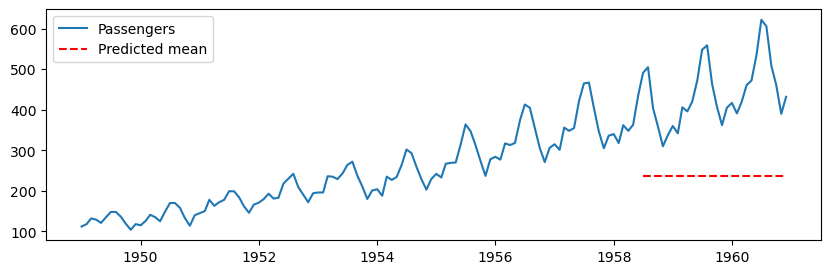

In [188]:
plt.plot(pas, label='Passengers')
plt.plot(pred_df, color='r',  linestyle='dashed', label='Predicted mean')
plt.legend()

In [160]:
comp = pas.Passengers[114:]

In [161]:
print (f'MAE: {metrics.rmse(comp, pred):.2f}')
print(f'RMSE: {metrics.mae(comp, pred):.2f}')

MAE: 218.41
RMSE: 204.25


### Модель SARIMAX.

In [174]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

In [175]:
pred = model.predict(114, 143, typ='levels')
pred_df = pd.DataFrame(pred)

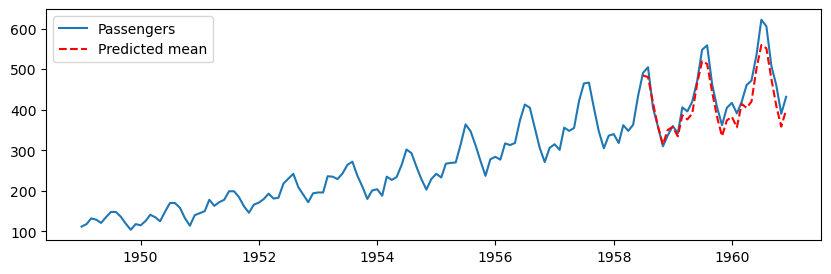

In [181]:
plt.plot(pas, label='Passengers')
plt.plot(pred_df, color='r', linestyle='dashed', label='Predicted mean')
plt.legend()

In [165]:
print (f'MAE: {metrics.rmse(comp, pred):.2f}')
print(f'RMSE: {metrics.mae(comp, pred):.2f}')

MAE: 31.64
RMSE: 26.61


### Висновок:
#### Модель ARIMA не вміє працювати ані з сезонністю ані з трендом і прогноз отриманий за допомогою ARIMA вкрай незадовільний. Це просто лінійне значення,отримане на основі авторегресії та ковзаючого середнього. Про низьку якість моделі свідчать і вкрай високі показники MAE і RMSE.   
#### На відміну від ARIMA, модель SARIMAX дає досить прийнятний прогноз. Це видно на графіку, а також по показникам MAE і RMSE.